
# **Library Import**

In [ ]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import History 
import keras.models
from keras.models import Sequential
from tensorflow.keras import layers
import keras
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn
from glob import glob
import os

# **Google Drive Connection**


In [ ]:
from google.colab import drive 
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# **Dataset Path**

In [ ]:
train_dir = os.path.join('/content/drive/MyDrive/Capstone_Project/BanglaLekha-Isolated/Train/Compound')
test_dir = os.path.join('/content/drive/MyDrive/Capstone_Project/BanglaLekha-Isolated/Test/Compound')

# **Library for counting files inside dataset**

In [ ]:
import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + "files"

# **Total Files inside Dataset**

In [ ]:
print('Total images for training :', count(train_dir))
print('Total images for validation :', count(test_dir))

Total images for training : /content/drive/MyDrive/Capstone_Project/BanglaLekha-Isolated/Train/Compound : 14971files
Total images for validation : /content/drive/MyDrive/Capstone_Project/BanglaLekha-Isolated/Test/Compound : 4509files


# **Reshape Images and Batch Size**

In [ ]:
batch_size = 32
img_height = 100
img_width = 100
train_dir = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.01,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14971 files belonging to 15 classes.
Using 14822 files for training.


In [ ]:
test_dir = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=0.8,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4509 files belonging to 15 classes.
Using 3607 files for validation.


# **Fetching Class Names**

In [ ]:
class_names = train_dir.class_names
print(class_names)

# **Data Visualization using matplotlib**

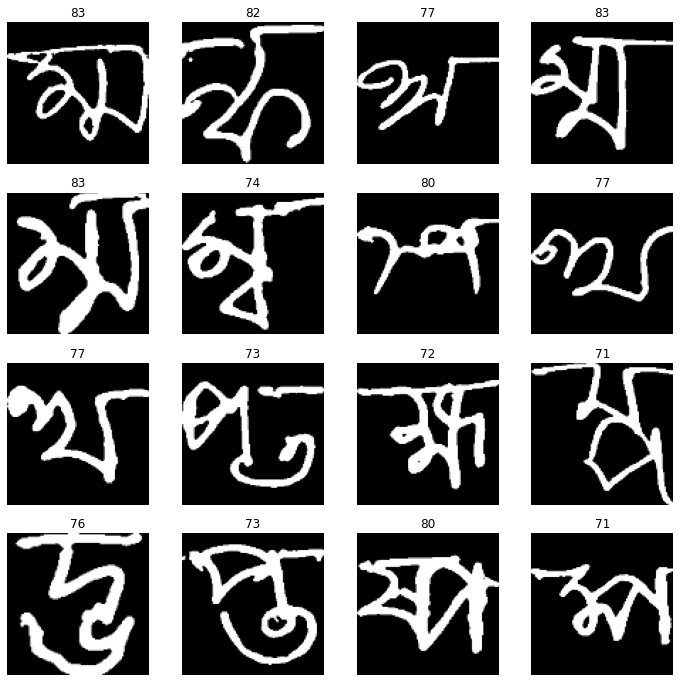

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for images, labels in train_dir.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# **Image Shape & Batch Size**

In [ ]:
for image_batch, labels_batch in train_dir:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
  input_shape=image_batch.shape

(32, 100, 100, 3)
(32,)


# **Configuring Dataset Performance**

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dir = train_dir.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dir = test_dir.cache().prefetch(buffer_size=AUTOTUNE)

# **Standardize the data**

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

# **Mapping the Dataset**

In [ ]:
normalized_ds = train_dir.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
#Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


# **CNN Model**

In [ ]:
num_classes = 15

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, 
                                              input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'
  ),

       layers.MaxPooling2D(),
       layers.Conv2D(32, 3, padding='same', activation='relu'
  ),

  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'
  ),

  layers.MaxPooling2D(),
  layers.Flatten(),

  layers.Dense(128, activation='relu'
  ),

  layers.Dense(num_classes)
]
)
 

# **Compile the Model**

In [ ]:
input_shape=image_batch.shape
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (32, 100, 100, 3)         0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (32, 100, 100, 16)        448       
_________________________________________________________________
module_wrapper_2 (ModuleWrap (32, 50, 50, 16)          0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (32, 50, 50, 32)          4640      
_________________________________________________________________
module_wrapper_4 (ModuleWrap (32, 25, 25, 32)          0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (32, 25, 25, 64)          18496     
_________________________________________________________________
module_wrapper_6 (ModuleWrap (32, 12, 12, 64)          0

# **Train The Model**

In [ ]:
epochs=50
history = model.fit(
  train_dir,
  epochs = epochs,    
  validation_data = test_dir)

Epoch 1/50
464/464 [==============================] - 56s 20ms/step - loss: 1.1718 - accuracy: 0.6309 - val_loss: 0.4073 - val_accuracy: 0.8755
Epoch 2/50
464/464 [==============================] - 4s 8ms/step - loss: 0.3046 - accuracy: 0.9018 - val_loss: 0.3340 - val_accuracy: 0.8952
Epoch 3/50
464/464 [==============================] - 4s 8ms/step - loss: 0.1433 - accuracy: 0.9542 - val_loss: 0.3975 - val_accuracy: 0.8849
Epoch 4/50
464/464 [==============================] - 4s 8ms/step - loss: 0.0644 - accuracy: 0.9774 - val_loss: 0.3778 - val_accuracy: 0.8974
Epoch 5/50
464/464 [==============================] - 4s 8ms/step - loss: 0.0432 - accuracy: 0.9872 - val_loss: 0.5163 - val_accuracy: 0.8794
Epoch 6/50
464/464 [==============================] - 4s 8ms/step - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.4372 - val_accuracy: 0.8996
Epoch 7/50
464/464 [==============================] - 4s 8ms/step - loss: 0.0241 - accuracy: 0.9947 - val_loss: 0.4620 - val_accuracy: 0.9010
Epoc

# **Visualize training and test results**

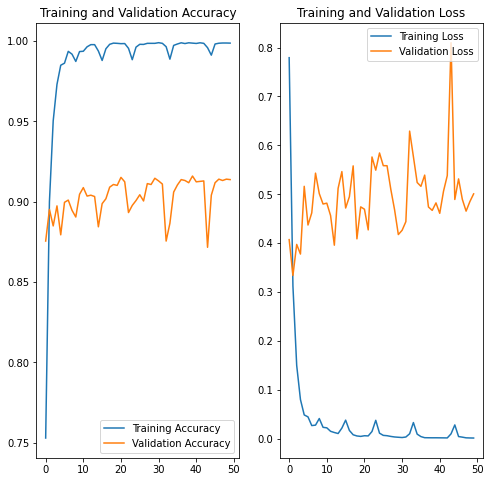

Maximum validation Accuracy: 91.59966707229614


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
print('Maximum validation Accuracy:', max(val_acc)*100)

# **Data Augmentation**

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

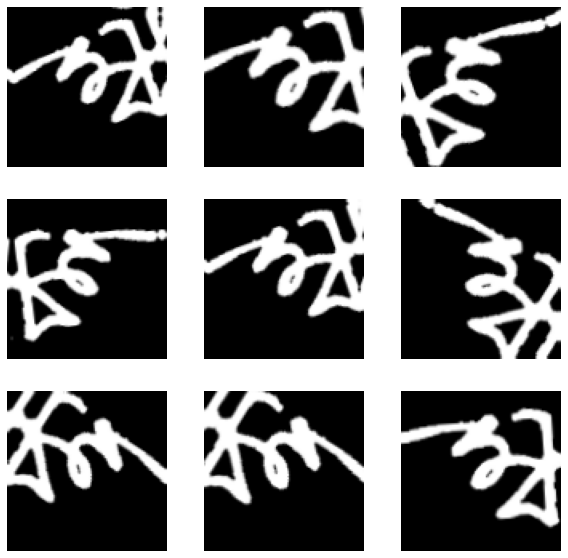

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dir.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# **Dropout**

In [ ]:
num_classes = 15

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# **Compile and Train the new model with Dropout**

In [ ]:
input_shape=image_batch.shape
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.build(input_shape)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (32, 100, 100, 3)         0         
_________________________________________________________________
module_wrapper_13 (ModuleWra (32, 100, 100, 3)         0         
_________________________________________________________________
module_wrapper_14 (ModuleWra (32, 100, 100, 16)        448       
_________________________________________________________________
module_wrapper_15 (ModuleWra (32, 50, 50, 16)          0         
_________________________________________________________________
module_wrapper_16 (ModuleWra (32, 50, 50, 32)          4640      
_________________________________________________________________
module_wrapper_17 (ModuleWra (32, 25, 25, 32)          0         
_________________________________________________________________
module_wrapper_18 (ModuleWra (32, 25, 25, 64)         

In [ ]:
epochs=45
history = model.fit(
  train_dir,
  epochs = epochs,    
  validation_data=test_dir)

Epoch 1/45
464/464 [==============================] - 4s 10ms/step - loss: 0.1178 - accuracy: 0.9615 - val_loss: 0.2427 - val_accuracy: 0.9304
Epoch 2/45
464/464 [==============================] - 4s 9ms/step - loss: 0.1150 - accuracy: 0.9599 - val_loss: 0.2485 - val_accuracy: 0.9340
Epoch 3/45
464/464 [==============================] - 4s 9ms/step - loss: 0.1167 - accuracy: 0.9613 - val_loss: 0.2296 - val_accuracy: 0.9373
Epoch 4/45
464/464 [==============================] - 4s 9ms/step - loss: 0.1238 - accuracy: 0.9586 - val_loss: 0.2337 - val_accuracy: 0.9376
Epoch 5/45
464/464 [==============================] - 4s 9ms/step - loss: 0.1210 - accuracy: 0.9601 - val_loss: 0.2443 - val_accuracy: 0.9318
Epoch 6/45
464/464 [==============================] - 4s 9ms/step - loss: 0.1113 - accuracy: 0.9630 - val_loss: 0.2782 - val_accuracy: 0.9287
Epoch 7/45
464/464 [==============================] - 4s 9ms/step - loss: 0.1152 - accuracy: 0.9611 - val_loss: 0.2553 - val_accuracy: 0.9318
Epoch

# **Visualize training results**

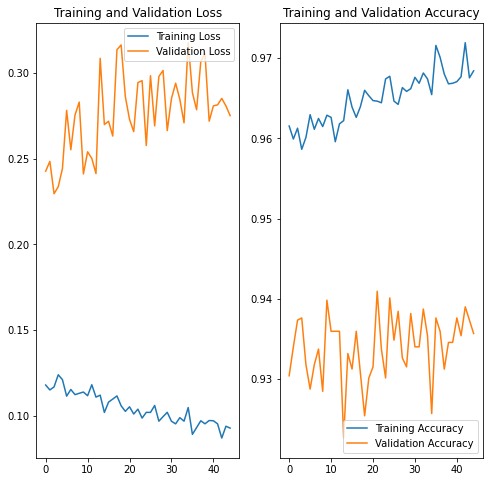

Maximum validation Accuracy: 94.09481287002563


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.show()
print('Maximum validation Accuracy:', max(val_acc)*100)